In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Load the Excel file
file_path = '/Users/areef/Desktop/Final Excel Files /WLTC_Class-2_Low.xlsx'
df = pd.read_excel(file_path)
# Function to calculate acceleration for each unique trip
def calculate_acceleration(df):
     def calculate_trip_acceleration(trip_df):
         trip_df = trip_df.copy()
        
         # Create a temporary 'Temp Dwell Time' column for calculations
         trip_df['Temp Dwell Time'] = trip_df['Dwell Time']
        
         # Set the first entry of 'Temp Dwell Time' to zero
         trip_df.iloc[0, trip_df.columns.get_loc('Temp Dwell Time')] = 0
        
         # Calculate Speed Difference
         trip_df['Speed Difference'] = trip_df['Speed'].diff()
        
         # Calculate Acceleration
         trip_df['Acceleration'] = trip_df.apply(
             lambda row: row['Speed Difference'] / (row['Temp Dwell Time']) if row['Temp Dwell Time'] > 0 else 0, axis=1)
        
         # Drop the temporary columns
         trip_df = trip_df.drop(columns=['Speed Difference', 'Temp Dwell Time'])
        
         return trip_df.infer_objects()
    
     return df.groupby('Trip').apply(calculate_trip_acceleration).reset_index(drop=True)

# Example usage with your DataFrames (assuming chauffeur_df and household_df are already defined)
df = calculate_acceleration(df)
# Function to calculate 'PKE Velocity Diff' and 'VSP' for each group of 'Trip'
def calculate_metrics(trip_df):
    # Calculate the consecutive speed difference squared
    trip_df['PKE Velocity Diff'] = trip_df['Speed'].shift(-1)**2 - trip_df['Speed']**2
    trip_df['PKE Velocity Diff'] = trip_df['PKE Velocity Diff'].fillna(0)
    
    # Calculate VSP using the given formula
    trip_df['VSP'] = trip_df['Speed'] * (1.1 * trip_df['Acceleration'] + 9.81 * 0.132) + 0.000302 * (trip_df['Speed'] ** 3)
    
    return trip_df

# Apply the function to each group of 'Trip'
df = df.groupby('Trip').apply(calculate_metrics)

# Reset index if needed
df.reset_index(drop=True, inplace=True)

df.to_excel('/Users/areef/Desktop/Final Excel Files /WLTC_Class-2_Low.xlsx', index=False)

# Function to calculate the driving mode percentages for each trip
def calculate_mode_percentages(group):
    return pd.Series({
        'Idle %': (group['Speed'] == 0).mean() * 100,
        'Cruising %': ((group['Acceleration'] > -0.01) & (group['Acceleration'] < 0.01)).mean() * 100,
        'Acceleration %': (group['Acceleration'] > 0.1).mean() * 100,
        'Deceleration %': (group['Acceleration'] < -0.01).mean() * 100
    })

# Group by 'Trip' and calculate the mode percentages for each trip
trip_mode_percentages = df.groupby('Trip').apply(calculate_mode_percentages)

# Calculate the average percentages for all trips
average_mode_percentages = trip_mode_percentages.mean()

# Output the average percentages
print("Average Driving Mode Percentages for All Trips:")
print(average_mode_percentages)

def calculate_additional_metrics(trip_df):
    return pd.Series({
        'Average Speed': trip_df['Speed'].mean(),
        'Maximum Speed': trip_df['Speed'].max(),
        '95th Percentile Speed': np.percentile(trip_df['Speed'], 95),
        'Maximum Acceleration': trip_df['Acceleration'][trip_df['Acceleration'] > 0].max(),
        'Maximum Deceleration': trip_df['Acceleration'][trip_df['Acceleration'] < 0].min(),
        'Average Acceleration': trip_df['Acceleration'][trip_df['Acceleration'] > 0].mean(),

        'Average Overall Positive VSP': trip_df['VSP'][trip_df['VSP'] > 0].mean(),
        'Maximum VSP': trip_df['VSP'][trip_df['VSP'] > 0].max(),
        'Minimum VSP': trip_df['VSP'][trip_df['VSP'] > 0].min()
    })

# Calculate additional metrics for each trip
trip_additional_metrics = df.groupby('Trip').apply(calculate_additional_metrics)

# Calculate the overall averages of the additional metrics
overall_additional_metrics = trip_additional_metrics.mean()
# Output the overall additional metrics
print("\nOverall Additional Metrics for All Trips:")
print(overall_additional_metrics)



/var/folders/7v/b0h1766n40n9kz118spn1wmr0000gn/T/ipykernel_1758/107514706.py:30: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return df.groupby('Trip').apply(calculate_trip_acceleration).reset_index(drop=True)
/var/folders/7v/b0h1766n40n9kz118spn1wmr0000gn/T/ipykernel_1758/107514706.py:46: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('Trip').apply(calculate_metrics)


Average Driving Mode Percentages for All Trips:
Idle %            26.271186
Cruising %        97.288136
Acceleration %     0.000000
Deceleration %     1.186441
dtype: float64

Overall Additional Metrics for All Trips:
Average Speed                    19.110339
Maximum Speed                    51.400000
95th Percentile Speed            46.410000
Maximum Acceleration              0.042593
Maximum Deceleration             -0.027778
Average Acceleration              0.002785
Average Overall Positive VSP     43.054374
Maximum VSP                     107.592433
Minimum VSP                       1.037918
dtype: float64


/var/folders/7v/b0h1766n40n9kz118spn1wmr0000gn/T/ipykernel_1758/107514706.py:63: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  trip_mode_percentages = df.groupby('Trip').apply(calculate_mode_percentages)
/var/folders/7v/b0h1766n40n9kz118spn1wmr0000gn/T/ipykernel_1758/107514706.py:87: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  trip_additional_metrics = df.groupby('Trip').apply(calculate_additional_metrics

In [2]:
import pandas as pd

# Load the Excel file
file_path = '/Users/areef/Desktop/Final Excel Files /Chauffeur_df_Peak.xlsx'
filtered_df = pd.read_excel(file_path)

# Filter the DataFrame for HH_IDs B17 and B65, and Day Types 2 and 3
#filtered_df = df[(df['HH_ID'].isin(['B17', 'B65'])) & (df['Day Type'].isin([2, 3]))]

# Make the first 'Dwell Time' entry for each unique 'Trip' zero
def adjust_dwell_time(group):
    group = group.copy()
    group.iloc[0, group.columns.get_loc('Dwell Time')] = 0
    return group

adjusted_df = filtered_df.groupby('Trip', group_keys=False).apply(adjust_dwell_time)

# Calculate the total dwell time for each trip
trip_times = adjusted_df.groupby('Trip')['Dwell Time'].sum()

# Calculate the average time taken to complete a unique 'Trip'
average_trip_time = trip_times.mean()

print("Average Trip Time:", average_trip_time)

Average Trip Time: 24.276545253863134


/var/folders/7v/b0h1766n40n9kz118spn1wmr0000gn/T/ipykernel_1403/1701770349.py:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  adjusted_df = filtered_df.groupby('Trip', group_keys=False).apply(adjust_dwell_time)


/var/folders/7v/b0h1766n40n9kz118spn1wmr0000gn/T/ipykernel_1403/1544480705.py:21: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  adjusted_df = filtered_df.groupby('Trip', group_keys=False).apply(adjust_dwell_time)
/var/folders/7v/b0h1766n40n9kz118spn1wmr0000gn/T/ipykernel_1403/1544480705.py:22: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  adjusted_df = adjusted_df.groupby('Trip', group_keys=False).apply(adj

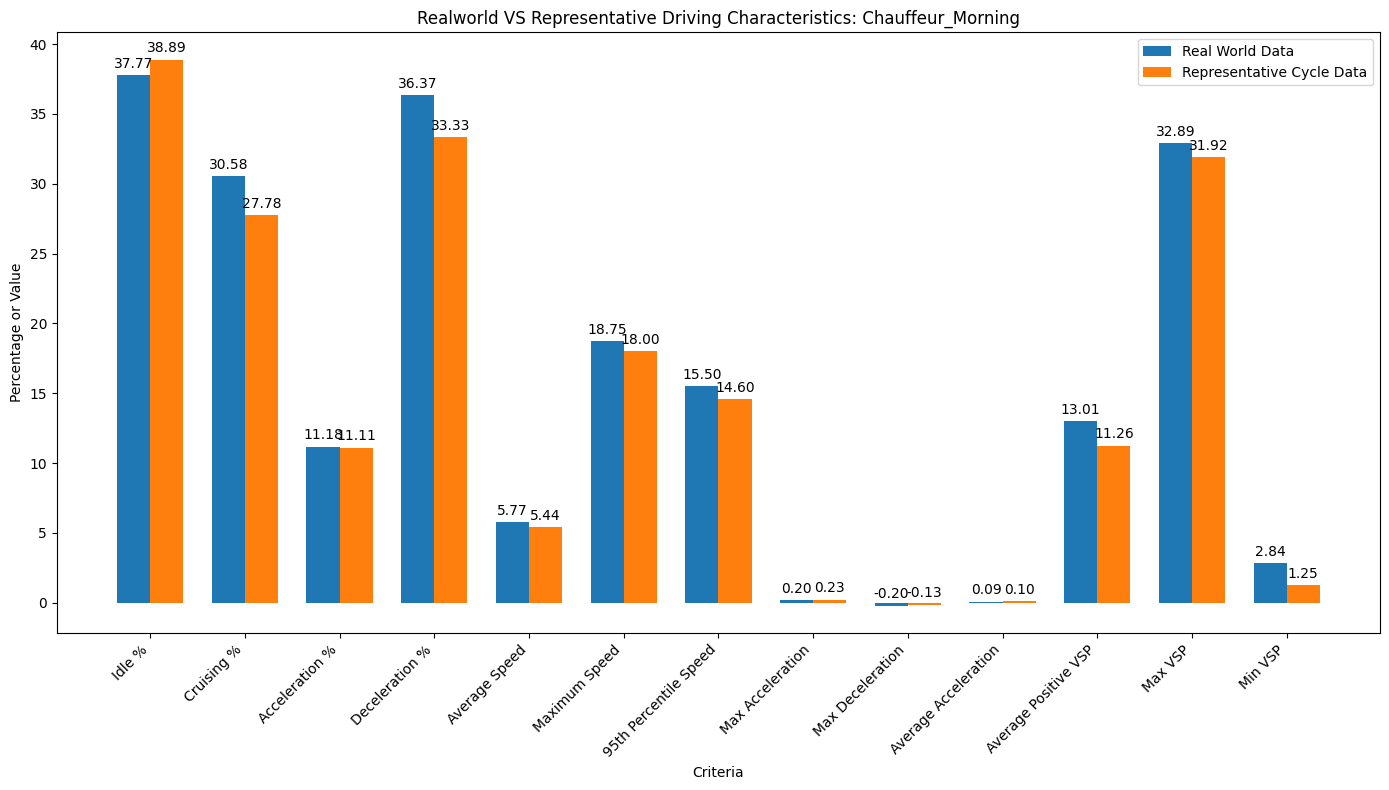

Simulation complete. Best result saved to 'Chauffeur_RepDC_Morning_All_Params.xlsx'.


In [5]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt

# Load the Excel file
file_path = '/Users/areef/Desktop/Final Excel Files /Chauffeur_df_Peak.xlsx'
filtered_df = pd.read_excel(file_path)

# Make the first 'Dwell Time' entry for each unique 'Trip' zero
def adjust_dwell_time(group):
    group = group.copy()
    group.iloc[0, group.columns.get_loc('Dwell Time')] = 0
    return group

def adjust_lat_long(group):
    group = group.copy()
    group.iloc[0, group.columns.get_loc('Lat-Long')] = 0
    return group
    
adjusted_df = filtered_df.groupby('Trip', group_keys=False).apply(adjust_dwell_time)
adjusted_df = adjusted_df.groupby('Trip', group_keys=False).apply(adjust_lat_long)

# Round the Acceleration values to two decimal places
adjusted_df['Acceleration'] = adjusted_df['Acceleration'].round(2)

# Create a matrix of unique Speed and Acceleration pairs
speed_accel_pairs = adjusted_df[['Speed', 'Acceleration']].drop_duplicates().reset_index(drop=True)

# Dictionary to store transition matrices
transition_matrices = {}

# Iterate over each unique Speed-Acceleration pair
for _, pair in speed_accel_pairs.iterrows():
    speed = pair['Speed']
    acceleration = pair['Acceleration']

    # Initialize a matrix for this Speed-Acceleration pair
    matrix = []

    # Find the indices of all rows for this Speed-Acceleration pair in adjusted_df
    pair_indices = adjusted_df[(adjusted_df['Speed'] == speed) & (adjusted_df['Acceleration'] == acceleration)].index

    # Calculate transitions to the next row in the dataframe
    for idx in pair_indices:
        if idx < len(adjusted_df) - 1:  # Ensure there is a next row
            current_speed = adjusted_df.iloc[idx]['Speed']
            next_speed = adjusted_df.iloc[idx + 1]['Speed']
            current_acceleration = adjusted_df.iloc[idx]['Acceleration']
            next_acceleration = adjusted_df.iloc[idx + 1]['Acceleration']
            dwell_time = adjusted_df.iloc[idx]['Dwell Time']
            lat_long = adjusted_df.iloc[idx]['Lat-Long']
            current_vsp = adjusted_df.iloc[idx]['VSP']
            #next_vsp = adjusted_df.iloc[idx + 1]['VSP']

            # Calculate transitions
            speed_diff = next_speed - current_speed
            acceleration_diff = next_acceleration - current_acceleration
            #vsp_diff = next_vsp - current_vsp

            # Check if this transition already exists in the matrix
            existing_transition = next((t for t in matrix if t[:5] == [speed_diff, acceleration_diff, dwell_time, lat_long, current_vsp]), None)
            if existing_transition:
                existing_transition[5] += 1  # Increment count
            else:
                # Append to the matrix: [speed_diff, acceleration_diff, dwell_time, lat_long, vsp_diff, count]
                matrix.append([speed_diff, acceleration_diff, dwell_time, lat_long, current_vsp, 1])

    # Save the matrix in the dictionary
    transition_matrices[(speed, acceleration)] = matrix

  

# Simulation parameters
desired_idle = 37.77
desired_cruising = 30.58
desired_acceleration = 11.18
desired_deceleration = 36.37

# Define new desired values for additional criteria
desired_average_speed = 5.77
desired_maximum_speed = 18.75
desired_95th_percentile_speed = 15.50
desired_maximum_acceleration = 0.20
desired_maximum_deceleration = -0.20
desired_average_acceleration = 0.09
desired_average_positive_vsp = 13.01
desired_maximum_vsp = 32.89
desired_minimum_vsp = 2.84
########This is the one you need to adjust
iterations = 2000

def calculate_discrepancy(simulation_result):
    idle_percentage = (simulation_result['Speed'] == 0).mean() * 100
    cruising_percentage = ((simulation_result['Acceleration'] > -0.01) & (simulation_result['Acceleration'] < 0.01)).mean() * 100
    acceleration_percentage = (simulation_result['Acceleration'] > 0.1).mean() * 100
    deceleration_percentage = (simulation_result['Acceleration'] < -0.01).mean() * 100

    # Calculate additional metrics for the simulation result
    average_speed = simulation_result['Speed'].mean()
    maximum_speed = simulation_result['Speed'].max()
    percentile_95th_speed = np.percentile(simulation_result['Speed'], 95)
    max_acceleration = simulation_result['Acceleration'][simulation_result['Acceleration'] > 0].max()
    max_deceleration = simulation_result['Acceleration'][simulation_result['Acceleration'] < 0].min()
    average_acceleration = simulation_result['Acceleration'][simulation_result['Acceleration'] > 0].mean()
    average_positive_vsp = simulation_result['VSP'][simulation_result['VSP'] > 0].mean()
    max_vsp = simulation_result['VSP'][simulation_result['VSP'] > 0].max()
    min_vsp = simulation_result['VSP'][simulation_result['VSP'] > 0].min()

    # Calculate discrepancies
    discrepancy = (
        abs(desired_idle - idle_percentage) +
        abs(desired_cruising - cruising_percentage) +
        abs(desired_acceleration - acceleration_percentage) +
        abs(desired_deceleration - deceleration_percentage) +
        abs(desired_average_speed - average_speed) +
        abs(desired_maximum_speed - maximum_speed) +
        abs(desired_95th_percentile_speed - percentile_95th_speed) +
        abs(desired_maximum_acceleration - max_acceleration) +
        abs(desired_maximum_deceleration - max_deceleration) +
        abs(desired_average_acceleration - average_acceleration) +
        abs(desired_average_positive_vsp - average_positive_vsp) +
        abs(desired_maximum_vsp - max_vsp) +
        abs(desired_minimum_vsp - min_vsp)
    )
    return (discrepancy, idle_percentage, cruising_percentage, acceleration_percentage, 
            deceleration_percentage, average_speed, maximum_speed, percentile_95th_speed, 
            max_acceleration, max_deceleration, average_acceleration, average_positive_vsp, max_vsp, min_vsp)

# Function to find the closest Speed-Acceleration pair
def find_closest_pair(current_speed, current_acceleration):
    min_distance = float('inf')
    closest_pair = None
    
    for (speed, acceleration) in transition_matrices.keys():
        if transition_matrices[(speed, acceleration)]:  # Ensure there are transitions
            distance = ((speed - current_speed) ** 2 + (acceleration - current_acceleration) ** 2) ** 0.5
            if distance < min_distance:
                min_distance = distance
                closest_pair = (speed, acceleration)
    
    return closest_pair

# Function to select a transition based on probability
def select_transition(transitions):
    if len(transitions) == 0:
        # If there are no transitions, return None or handle this case as needed
        return None
    
    counts = np.array([t[4] for t in transitions])
    if counts.sum() == 0:
        # If all counts are zero, select randomly
        selected_index = np.random.choice(len(transitions))
    else:
        probabilities = counts / counts.sum()
        selected_index = np.random.choice(len(transitions), p=probabilities)

    selected_transition = transitions[selected_index]

    # Decrease the probability of the selected transition
    std_dev = np.std(counts)
    transitions[selected_index][4] = max(0, transitions[selected_index][4] - std_dev)

    return selected_transition

# Function to simulate the driving cycle
def simulate_driving_cycle():
    current_speed = 0
    current_acceleration = 0
    total_dwell_time = 0

    result = []

    max_iterations = 10000  # Limit the maximum number of iterations
    iteration_count = 0

    while total_dwell_time < 25 and iteration_count < max_iterations:
        iteration_count += 1

        if (current_speed, current_acceleration) not in transition_matrices or not transition_matrices[(current_speed, current_acceleration)]:
            closest_pair = find_closest_pair(current_speed, current_acceleration)
            if closest_pair is None:
                print("No valid transition found, breaking out of loop.")
                break
            current_speed, current_acceleration = closest_pair

        transitions = transition_matrices[(current_speed, current_acceleration)]
        transition = select_transition(transitions)

        if transition is None:
            print("No valid transition found, switching to closest pair.")
            closest_pair = find_closest_pair(current_speed, current_acceleration)
            if closest_pair is None:
                print("No closest pair found, breaking out of loop.")
                break
            current_speed, current_acceleration = closest_pair
            continue

        speed_diff, acceleration_diff, dwell_time, lat_long, current_vsp = transition[:5]
        next_speed = current_speed + speed_diff
        next_acceleration = current_acceleration + acceleration_diff

        result.append({'Speed': next_speed, 'Acceleration': next_acceleration, 'Dwell Time': dwell_time, 'Lat-Long': lat_long, 'VSP': adjusted_df['VSP'].iloc[iteration_count % len(adjusted_df)]})
        
        current_speed = next_speed
        current_acceleration = next_acceleration

        total_dwell_time += dwell_time

        if total_dwell_time == 25 and next_speed <= 4:
            break

    if iteration_count >= max_iterations:
        print("Max iterations reached, exiting loop.")
    
    simulation_result = pd.DataFrame(result)
    return simulation_result

# Run the simulation for a number of iterations
best_result = None
lowest_discrepancy = float('inf')
best_criteria = None

for _ in range(iterations):
    simulation_result = simulate_driving_cycle()
    discrepancy, idle_percentage, cruising_percentage, acceleration_percentage, deceleration_percentage, average_speed, maximum_speed, percentile_95th_speed, max_acceleration, max_deceleration, average_acceleration, average_positive_vsp, max_vsp, min_vsp = calculate_discrepancy(simulation_result)

    if discrepancy < lowest_discrepancy:
        lowest_discrepancy = discrepancy
        best_result = simulation_result
        best_criteria = {
            "Idle %": idle_percentage,
            "Cruising %": cruising_percentage,
            "Acceleration %": acceleration_percentage,
            "Deceleration %": deceleration_percentage,
            "Average Speed": average_speed,
            "Maximum Speed": maximum_speed,
            "95th Percentile Speed": percentile_95th_speed,
            "Max Acceleration": max_acceleration,
            "Max Deceleration": max_deceleration,
            "Average Acceleration": average_acceleration,
            "Average Positive VSP": average_positive_vsp,
            "Max VSP": max_vsp,
            "Min VSP": min_vsp
        }

# Output the best result to an Excel file
best_result.to_excel('/Users/areef/Desktop/Final Excel Files /Chauffeur_RepDC_Peak_All_Params.xlsx', index=False)

# Plot the discrepancies
if best_criteria:
    criteria_labels = ["Idle %", "Cruising %", "Acceleration %", "Deceleration %", "Average Speed", "Maximum Speed", "95th Percentile Speed", "Max Acceleration", "Max Deceleration", "Average Acceleration", "Average Positive VSP", "Max VSP", "Min VSP"]
    desired_values = [desired_idle, desired_cruising, desired_acceleration, desired_deceleration, desired_average_speed, desired_maximum_speed, desired_95th_percentile_speed, desired_maximum_acceleration, desired_maximum_deceleration, desired_average_acceleration, desired_average_positive_vsp, desired_maximum_vsp, desired_minimum_vsp]
    actual_values = [best_criteria["Idle %"], best_criteria["Cruising %"], best_criteria["Acceleration %"], best_criteria["Deceleration %"], best_criteria["Average Speed"], best_criteria["Maximum Speed"], best_criteria["95th Percentile Speed"], best_criteria["Max Acceleration"], best_criteria["Max Deceleration"], best_criteria["Average Acceleration"], best_criteria["Average Positive VSP"], best_criteria["Max VSP"], best_criteria["Min VSP"]]

    x = np.arange(len(criteria_labels))
    width = 0.35

    fig, ax = plt.subplots(figsize=(14, 8))
    bars1 = ax.bar(x - width/2, desired_values, width, label='Real World Data')
    bars2 = ax.bar(x + width/2, actual_values, width, label='Representative Cycle Data')

    ax.set_xlabel('Criteria')
    ax.set_ylabel('Percentage or Value')
    ax.set_title('Realworld VS Representative Driving Characteristics: Chauffeur_Morning')
    ax.set_xticks(x)
    ax.set_xticklabels(criteria_labels, rotation=45, ha='right')
    ax.legend()

    def autolabel(bars):
        for bar in bars:
            height = bar.get_height()
            ax.annotate(f'{height:.2f}',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),
                        textcoords="offset points",
                        ha='center', va='bottom')

    autolabel(bars1)
    autolabel(bars2)

    plt.tight_layout()
    plt.show()

print("Simulation complete. Best result saved to 'Chauffeur_RepDC_Morning_All_Params.xlsx'.")


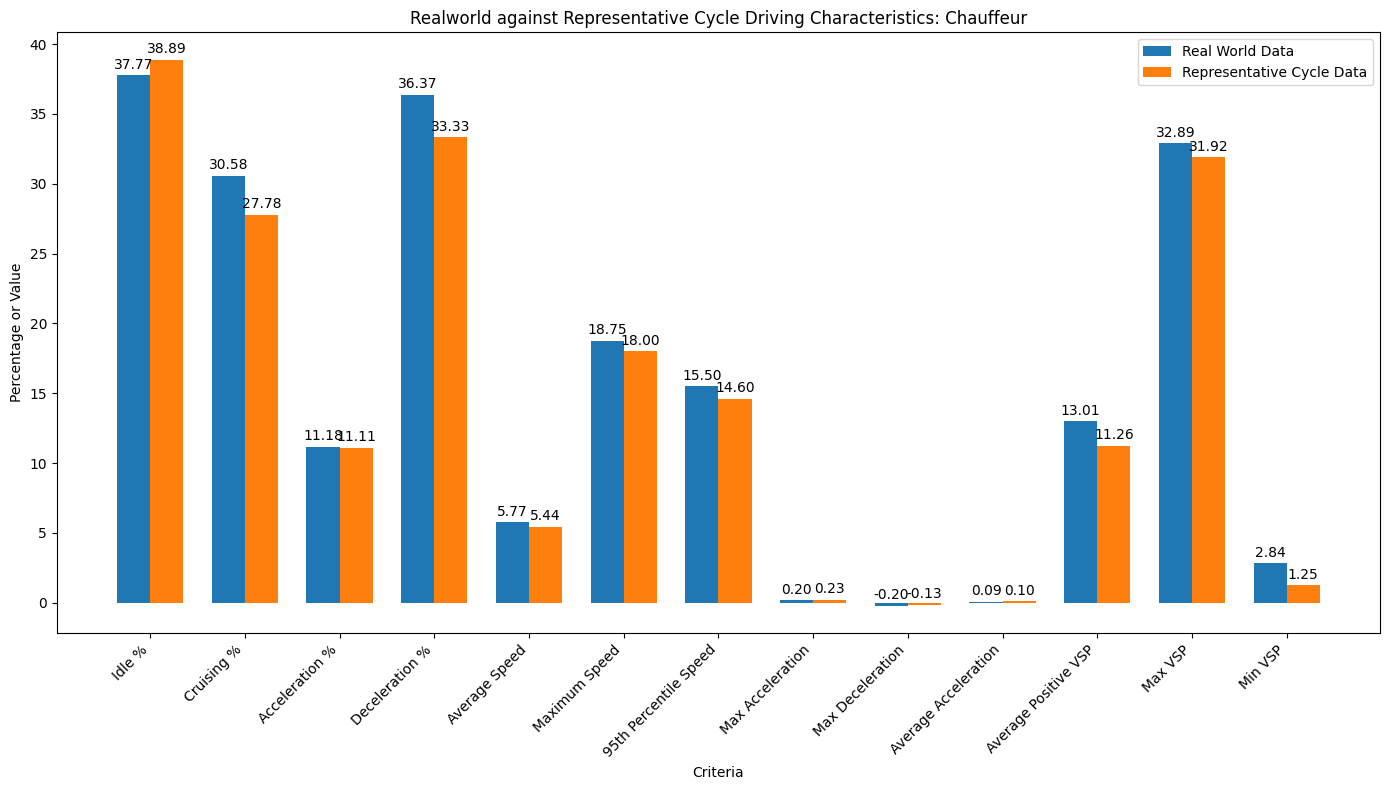

Simulation complete. Best result saved to 'Chauffeur_RepDC_Morning_All_Params.xlsx'.


In [6]:
# Plot the discrepancies
if best_criteria:
    criteria_labels = ["Idle %", "Cruising %", "Acceleration %", "Deceleration %", "Average Speed", "Maximum Speed", "95th Percentile Speed", "Max Acceleration", "Max Deceleration", "Average Acceleration", "Average Positive VSP", "Max VSP", "Min VSP"]
    desired_values = [desired_idle, desired_cruising, desired_acceleration, desired_deceleration, desired_average_speed, desired_maximum_speed, desired_95th_percentile_speed, desired_maximum_acceleration, desired_maximum_deceleration, desired_average_acceleration, desired_average_positive_vsp, desired_maximum_vsp, desired_minimum_vsp]
    actual_values = [best_criteria["Idle %"], best_criteria["Cruising %"], best_criteria["Acceleration %"], best_criteria["Deceleration %"], best_criteria["Average Speed"], best_criteria["Maximum Speed"], best_criteria["95th Percentile Speed"], best_criteria["Max Acceleration"], best_criteria["Max Deceleration"], best_criteria["Average Acceleration"], best_criteria["Average Positive VSP"], best_criteria["Max VSP"], best_criteria["Min VSP"]]

    x = np.arange(len(criteria_labels))
    width = 0.35

    fig, ax = plt.subplots(figsize=(14, 8))
    bars1 = ax.bar(x - width/2, desired_values, width, label='Real World Data')
    bars2 = ax.bar(x + width/2, actual_values, width, label='Representative Cycle Data')

    ax.set_xlabel('Criteria')
    ax.set_ylabel('Percentage or Value')
    ax.set_title('Realworld against Representative Cycle Driving Characteristics: Chauffeur')
    ax.set_xticks(x)
    ax.set_xticklabels(criteria_labels, rotation=45, ha='right')
    ax.legend()

    def autolabel(bars):
        for bar in bars:
            height = bar.get_height()
            ax.annotate(f'{height:.2f}',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 2.5),
                        textcoords="offset points",
                        ha='center', va='bottom')

    autolabel(bars1)
    autolabel(bars2)

    plt.tight_layout()
        # Save the plot as an image file
    save_path = "/Users/areef/Desktop/Final Excel Files /Realworld against Representative Driving Characteristics: Chauffeur"  # Modify this path as needed
    plt.savefig(save_path, dpi=300, bbox_inches="tight")  # Adjust dpi for resolution

    plt.show()

print("Simulation complete. Best result saved to 'Chauffeur_RepDC_Morning_All_Params.xlsx'.")

Earth Mover's Distance between distributions: 0.0011
Sum of Absolute Differences: 1.3216


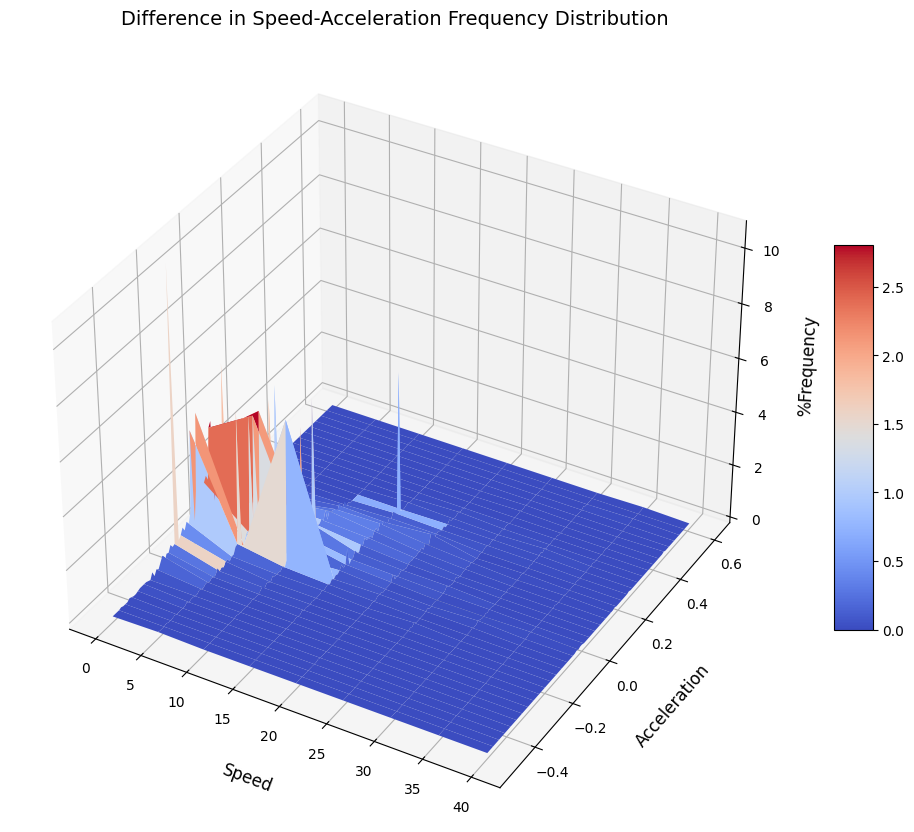

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import wasserstein_distance
from mpl_toolkits.mplot3d import Axes3D

# File paths
real_world_file = '/Users/areef/Downloads/updated_Chauffeur_df_MorningPeak.xlsx'
simulated_file = '/Users/areef/Downloads/Chauffeur_RepDC_Morning_All_Params.xlsx'

# Load the data
real_world_data = pd.read_excel(real_world_file)
simulated_data = pd.read_excel(simulated_file)

# Extract speed and acceleration columns
real_world_speeds = real_world_data['Speed']
real_world_accelerations = real_world_data['Acceleration']

simulated_speeds = simulated_data['Speed']
simulated_accelerations = simulated_data['Acceleration']

# Define the bins with specified resolution
speed_min = min(real_world_speeds.min(), simulated_speeds.min())
speed_max = max(real_world_speeds.max(), simulated_speeds.max())
speed_bins = np.arange(speed_min, speed_max + 5, 5)  # Speed bins with resolution of 5

accel_min = min(real_world_accelerations.min(), simulated_accelerations.min())
accel_max = max(real_world_accelerations.max(), simulated_accelerations.max())
acceleration_bins = np.arange(accel_min, accel_max + 0.01, 0.01)  # Acceleration bins with resolution of 0.01

# Calculate the 2D histograms
real_world_hist, _, _ = np.histogram2d(
    real_world_speeds, real_world_accelerations, bins=[speed_bins, acceleration_bins]
)
simulated_hist, _, _ = np.histogram2d(
    simulated_speeds, simulated_accelerations, bins=[speed_bins, acceleration_bins]
)

# Normalize the histograms
real_world_hist_normalized = real_world_hist / real_world_hist.sum()
simulated_hist_normalized = simulated_hist / simulated_hist.sum()

# Calculate the absolute difference
hist_difference = (np.abs(real_world_hist_normalized - simulated_hist_normalized))*100

# Calculate a score using Earth Mover's Distance
real_world_flat = real_world_hist_normalized.flatten()
simulated_flat = simulated_hist_normalized.flatten()
emd_score = wasserstein_distance(real_world_flat, simulated_flat)
print(f"Earth Mover's Distance between distributions: {emd_score:.4f}")

# Calculate a simple sum of absolute differences as another score
sum_of_differences = (np.sum(hist_difference))/len(acceleration_bins)
print(f"Sum of Absolute Differences: {sum_of_differences:.4f}")

# Visualize the difference using a 3D plot
X, Y = np.meshgrid(speed_bins[:-1], acceleration_bins[:-1])
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')
surface = ax.plot_surface(X, Y, hist_difference.T, cmap='coolwarm', edgecolor='none')

# Set labels with improved visibility
ax.set_title('Difference in Speed-Acceleration Frequency Distribution', fontsize=14, pad=20)
ax.set_xlabel('Speed', fontsize=12, labelpad=15)
ax.set_ylabel('Acceleration', fontsize=12, labelpad=15)
ax.set_zlabel('%Frequency', fontsize=12, labelpad=10)

# Adjust the view angle for better visibility of z-axis
ax.view_init(elev=35, azim=-60)

# Add a color bar
fig.colorbar(surface, ax=ax, shrink=0.5, aspect=10)
save_path = "/Users/areef/Downloads/SAFD: Chauffeur_Morning"  # Modify this path as needed
plt.savefig(save_path, dpi=300, bbox_inches="tight")  # Adjust dpi for resolution
plt.show()

Earth Mover's Distance between distributions: 0.0013
Sum of Absolute Differences: 1.2712


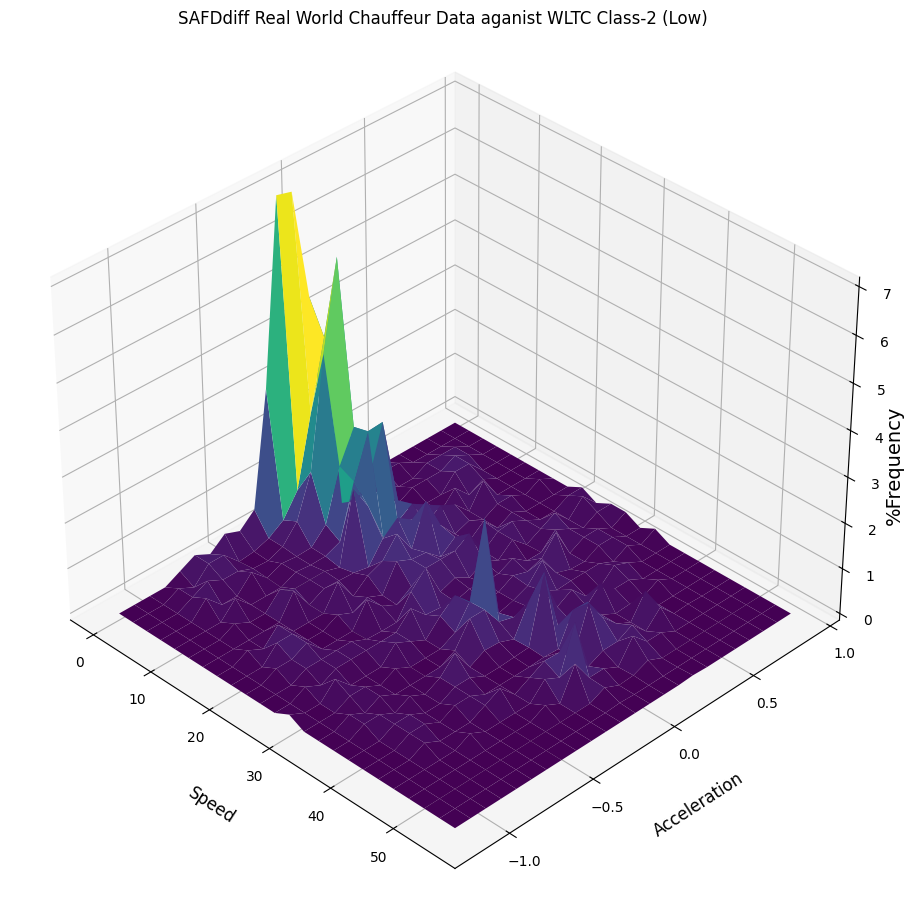

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import wasserstein_distance
from mpl_toolkits.mplot3d import Axes3D

# File paths
real_world_file = '/Users/areef/Desktop/Final Excel Files /Chauffeur_df_Peak.xlsx'
simulated_file = '/Users/areef/Desktop/Final Excel Files /WLTC_Class-2_Low.xlsx'

# Load the data
real_world_data = pd.read_excel(real_world_file)
simulated_data = pd.read_excel(simulated_file)

# Extract speed and acceleration columns
real_world_speeds = real_world_data['Speed']
real_world_accelerations = real_world_data['Acceleration']

simulated_speeds = simulated_data['Speed']
simulated_accelerations = simulated_data['Acceleration']

# Define the bins
speed_bins = np.linspace(
    min(real_world_speeds.min(), simulated_speeds.min()), 
    max(real_world_speeds.max(), simulated_speeds.max()), 
    25
)
acceleration_bins = np.linspace(
    min(real_world_accelerations.min(), simulated_accelerations.min()), 
    max(real_world_accelerations.max(), simulated_accelerations.max()), 
    25
)

# Calculate the 2D histograms
real_world_hist, _, _ = np.histogram2d(
    real_world_speeds, real_world_accelerations, bins=[speed_bins, acceleration_bins]
)
simulated_hist, _, _ = np.histogram2d(
    simulated_speeds, simulated_accelerations, bins=[speed_bins, acceleration_bins]
)

# Normalize the histograms
real_world_hist_normalized = real_world_hist / real_world_hist.sum()
simulated_hist_normalized = simulated_hist / simulated_hist.sum()

# Calculate the absolute difference
hist_difference = (np.abs(simulated_hist_normalized - real_world_hist_normalized)) * 100

# Calculate a score using Earth Mover's Distance
real_world_flat = real_world_hist_normalized.flatten()
simulated_flat = simulated_hist_normalized.flatten()
emd_score = wasserstein_distance(real_world_flat, simulated_flat)
print(f"Earth Mover's Distance between distributions: {emd_score:.4f}")

# Calculate a simple sum of absolute differences as another score
sum_of_differences = (np.sum(hist_difference)) / ((np.sum(real_world_hist_normalized))*100)
print(f"Sum of Absolute Differences: {sum_of_differences:.4f}")

# Visualize the difference using a 3D plot
X, Y = np.meshgrid(speed_bins[:-1], acceleration_bins[:-1])
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, hist_difference.T, cmap='viridis', edgecolor='none')

ax.set_title('SAFDdiff Real World Chauffeur Data aganist WLTC Class-2 (Low)')
ax.set_xlabel('Speed', fontsize=12, labelpad=15)
ax.set_ylabel('Acceleration', fontsize=12, labelpad=15)
#ax.set_zlabel('%Frequency', fontsize=14, labelpad=15)
# Hide the default z-label and use a text label
ax.zaxis.label.set_visible(False)

# Manually position the z-axis label on the right
ax.text2D(1.02, 0.5, '%Frequency', fontsize=14, ha='center', va='center', transform=ax.transAxes, rotation=90)
# Adjust the view angle for better visibility of z-axis
ax.view_init(elev=35, azim=-45)


# Adjust layout for better visibility
plt.tight_layout(pad=4.0)
#save_path = "/Users/areef/Downloads/SAFD_Spike_WLTC_Class-2_Low_Household"  # Modify this path as needed
save_path = "/Users/areef/Desktop/Final Excel Files /SAFD_Spike_WLTC_Chauffeur"
plt.savefig(save_path, dpi=300, bbox_inches="tight")  # Adjust dpi for resolution
plt.show()


In [ ]:
#SAFDdiff Chauffeur = 1.067
#SAFDdiff WLTC_Household = 1.2712

Plot 1: Earth Mover's Distance between distributions: 0.0009
Plot 2: Earth Mover's Distance between distributions: 0.0003
Plot 3: Earth Mover's Distance between distributions: 0.0003
Plot 4: Earth Mover's Distance between distributions: 0.0003


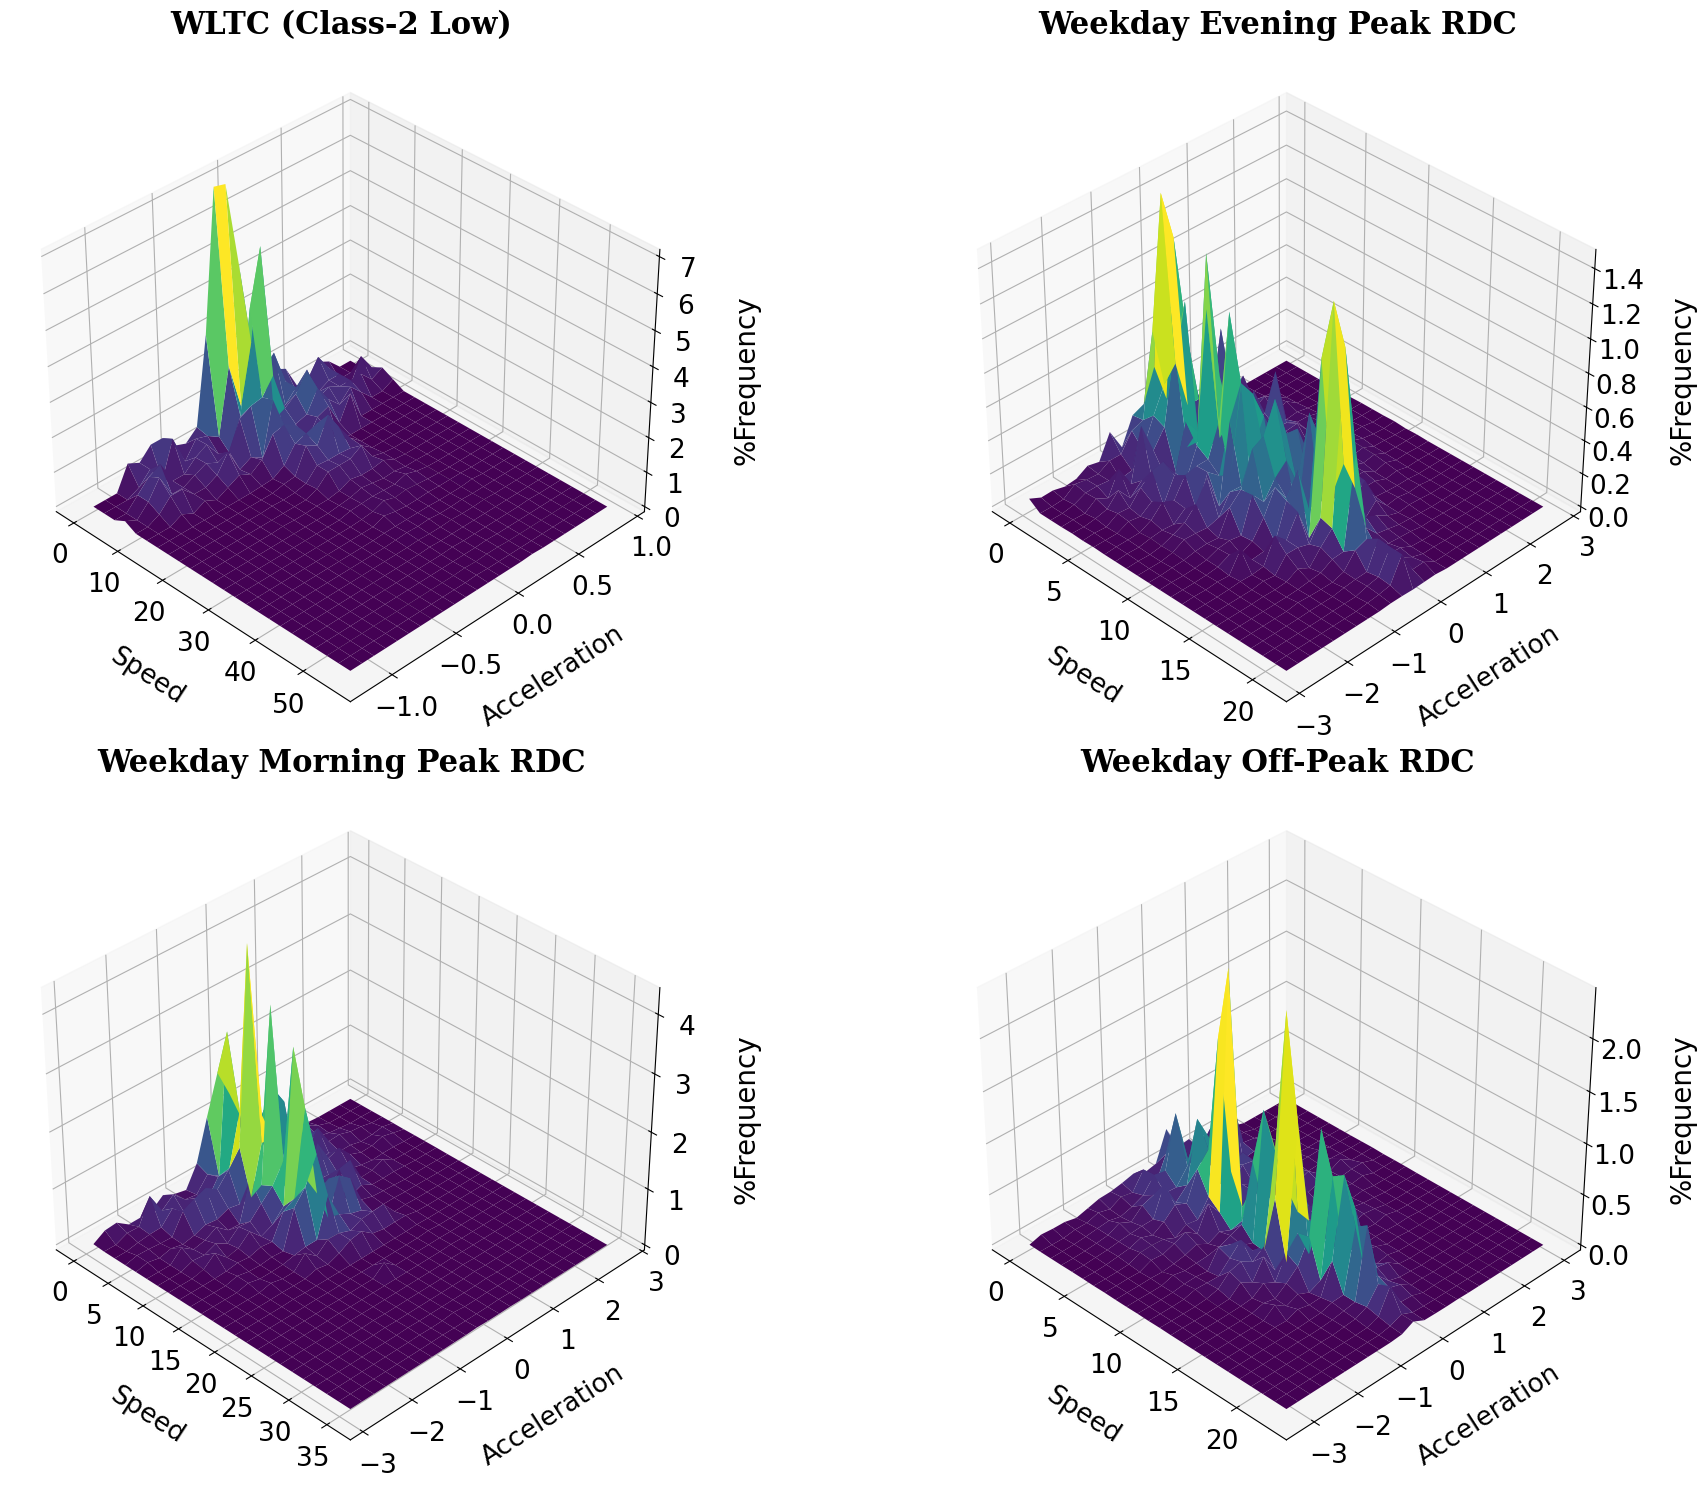

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import wasserstein_distance
from mpl_toolkits.mplot3d import Axes3D

# File paths
file_pairs = [
    ('/Users/areef/Desktop/Final Excel Files /Chauffeur_df_Peak.xlsx', 
     '/Users/areef/Desktop/Final Excel Files /WLTC_Class-2_Low.xlsx'),
    ('/Users/areef/Desktop/Final Excel Files /SVTrip Output/SVTrip_Output_Weekday_Evening_Peak.xlsx', 
     '/Users/areef/Desktop/Final Excel Files /Final Simulated File /Simulated_Cycle_Wekday_Evening_Peak_trips.xlsx'),
    ('/Users/areef/Desktop/Final Excel Files /SVTrip Output/SVTrip_Output_Weekday_Morning_Peak.xlsx', 
     '/Users/areef/Desktop/Final Excel Files /Final Simulated File /Simulated_Cycle_Wekday_Morning_Peak_trips.xlsx'),
    ('/Users/areef/Desktop/Final Excel Files /SVTrip Output/SVTrip_Output_Weekday_Off-Peak.xlsx', 
     '/Users/areef/Desktop/Final Excel Files /Final Simulated File /Simulated_Cycle_Wekday_Off-Peak_trips.xlsx')
]

# Titles for the subplots
titles = [
    'WLTC (Class-2 Low)',
    'Weekday Evening Peak RDC',
    'Weekday Morning Peak RDC',
    'Weekday Off-Peak RDC'
]

# Font customization
title_font = {'fontsize': 22, 'fontweight': 'bold', 'fontfamily': 'serif'}
label_font = {'fontsize': 19, 'fontweight': 'medium', 'fontfamily': 'sans-serif'}
tick_font = {'fontsize': 19, 'fontweight': 'light', 'fontfamily': 'monospace'}

# Prepare the 2x2 plot grid
fig, axes = plt.subplots(2, 2, subplot_kw={'projection': '3d'}, figsize=(20, 15))

# Iterate through file pairs and generate plots
for i, (real_world_file, simulated_file) in enumerate(file_pairs):
    # Load the data
    real_world_data = pd.read_excel(real_world_file)
    simulated_data = pd.read_excel(simulated_file)

    # Extract speed and acceleration columns
    real_world_speeds = real_world_data['Speed']
    real_world_accelerations = real_world_data['Acceleration']
    simulated_speeds = simulated_data['Speed']
    simulated_accelerations = simulated_data['Acceleration']

    # Define the bins
    speed_bins = np.linspace(
        min(real_world_speeds.min(), simulated_speeds.min()), 
        max(real_world_speeds.max(), simulated_speeds.max()), 
        25
    )
    acceleration_bins = np.linspace(
        min(real_world_accelerations.min(), simulated_accelerations.min()), 
        max(real_world_accelerations.max(), simulated_accelerations.max()), 
        25
    )

    # Calculate the 2D histograms
    real_world_hist, _, _ = np.histogram2d(
        real_world_speeds, real_world_accelerations, bins=[speed_bins, acceleration_bins]
    )
    simulated_hist, _, _ = np.histogram2d(
        simulated_speeds, simulated_accelerations, bins=[speed_bins, acceleration_bins]
    )

    # Normalize the histograms
    real_world_hist_normalized = real_world_hist / real_world_hist.sum()
    simulated_hist_normalized = simulated_hist / simulated_hist.sum()

    # Calculate the absolute difference
    hist_difference = (np.abs(simulated_hist_normalized - real_world_hist_normalized)) * 100

    # Calculate a score using Earth Mover's Distance
    real_world_flat = real_world_hist_normalized.flatten()
    simulated_flat = simulated_hist_normalized.flatten()
    emd_score = wasserstein_distance(real_world_flat, simulated_flat)
    print(f"Plot {i+1}: Earth Mover's Distance between distributions: {emd_score:.4f}")

    # Plot the difference
    ax = axes[i // 2, i % 2]
    X, Y = np.meshgrid(speed_bins[:-1], acceleration_bins[:-1])
    ax.plot_surface(X, Y, hist_difference.T, cmap='viridis', edgecolor='none')

    # Set title and labels with custom font
    ax.set_title(titles[i], **title_font, pad=20)
    ax.set_xlabel('Speed', **label_font, labelpad=20)
    ax.set_ylabel('Acceleration', **label_font, labelpad=20)
    ax.zaxis.label.set_visible(False)
    ax.text2D(1.09, 0.4, '%Frequency', fontsize=20, transform=ax.transAxes, rotation=90)

    # Customize ticks
    ax.tick_params(axis='both', which='major', labelsize=tick_font['fontsize'])

    # Adjust the viewing angle
    ax.view_init(elev=35, azim=-45)

# Adjust layout and save the figure
plt.tight_layout(pad=1.7)
save_path = "/Users/areef/Desktop/Final Excel Files /SAFD_Comparison_2x2_Grid_Custom_Fonts.png"
plt.savefig(save_path, dpi=600, bbox_inches="tight")
plt.show()


In [6]:
import pandas as pd
from datetime import datetime

# Define the timeframes
timeframes = {
    "07:00 a.m. - 12:00 p.m.": ("07:00:00", "11:00:00"),
    "12:01 p.m. to 4:30 p.m.": ("11:01:00", "16:30:00"),
    "05:00 p.m. - 08:30 p.m.": ("17:00:00", "19:30:00"),
    "09:00 p.m. to 12:00 a.m.": ("20:00:00", "23:59:59"),
}

# Load the Excel file
file_path = '/Users/areef/Desktop/Final Excel Files /household_df_Weekend.xlsx'
data = pd.read_excel(file_path)

# Ensure 'Time' column is in datetime format
data['Time'] = pd.to_datetime(data['Time'])

# Get the first entry of 'Time' for each unique 'Trip'
first_entries = data.groupby('Trip').first().reset_index()

# Initialize a dictionary to count trips in each timeframe
timeframe_counts = {key: 0 for key in timeframes.keys()}

# Stratify trips into timeframes
for _, row in first_entries.iterrows():
    trip_time = row['Time'].time()  # Get the time part only
    for timeframe, (start, end) in timeframes.items():
        start_time = datetime.strptime(start, "%H:%M:%S").time()
        end_time = datetime.strptime(end, "%H:%M:%S").time()
        if start_time <= trip_time <= end_time:
            timeframe_counts[timeframe] += 1
            break

# Display the results
for timeframe, count in timeframe_counts.items():
    print(f"{timeframe}: {count} trips")

/var/folders/7v/b0h1766n40n9kz118spn1wmr0000gn/T/ipykernel_1906/3228916466.py:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Time'] = pd.to_datetime(data['Time'])


07:00 a.m. - 12:00 p.m.: 12 trips
12:01 p.m. to 4:30 p.m.: 32 trips
05:00 p.m. - 08:30 p.m.: 18 trips
09:00 p.m. to 12:00 a.m.: 21 trips
